<a href="https://colab.research.google.com/github/JerryKurata/First-NN-Tensorflow/blob/master/House_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensor Flow House Price Prediction

This is a simple Tensorflow based notebook that applies the steps of the machine learning workflow to create, train, and test a model that will predict house prices.

The notebook:

*  Uses the steps of the machine workflow discussed in the course
*  Illustrates how TensorFlow makes it easier to implement a machine learning solution
*  Describes what is happening in various processing steps



## Load correct version of TensorFlow
Before we use TensorFlow we must load the correct version.  We want version 2.x. To do this we execute the colab commands below.  Note that these commands **ONLY WORK IN COLAB.**

In [0]:
# Select the version of TensorFlow using Colab's tensorflow_version command
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow 2.x selected.


## Import Libraries

We import TensorFlow, Numpy, and matplotlib libraries.  

Numpy is a powerful N-dimensional array library that
allows us to easily create and manipulate arrays of data, and more!

Numpy also allows us to convert TensorFlow's native data structures,
to python native data types.

matplotlib is a graphics plot library

In [0]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# In colab we can turn on GPU acceleration in Notebook settings
print("GPU is available:", tf.test.is_gpu_available())

TensorFlow version: 2.0.0
GPU is available: True


## Problem Statement

Using example data, develop a model that predicts house prices based on the size of a house.


## Get Data

In this example we will be using a truncated version of the Ames dataset that only contains information on homes sold in May 2010.

### About the Ames dataset.

The Ames dataset is a widely avalable dataset that has become one of the standard datasets used when
predicting home prices based on features of the home. It is based on the great work of Dean De Cock.  His rational
and insight into this dataset can be found at http://jse.amstat.org/v19n3/decock.pdf.


### Getting the truncated dataset we use
This dataset can be found with the exercise files for this course.  The filename is **AmesHousing-05-2010.csv** .

Before you run the code below, ensure you have downloaded the file to your computer.  

And when prompted, browse to the file's location on your computer and upload the file.

*Warning: The file upload function will only show the file selection dialog for 30 seconds.  After that time it will close and cause an error because a file was not specified.  This timeout prevents the file dialog from blocking events in colab.  If you experience this timeout select the dataset file sooner.  It may help to move the dataset file to an easier to specify location such as your desktop.*



In [0]:
# You need to upload the file, AmesHousing-05-2001.csv provided with this course
from google.colab import files

# only load the single file
uploaded = files.upload()
# csv_housefile contains the name of the first, and only file uploaded
csv_housefile = next(iter(uploaded.keys()))

print('User uploaded file "{name}" with length {length} bytes'.format(
      name=csv_housefile, length=len(uploaded[csv_housefile])))


Saving AmesHousing-05-2010.csv to AmesHousing-05-2010 (2).csv
User uploaded file "AmesHousing-05-2010.csv" with length 20140 bytes


### Load the data into a pandas dataframe

Pandas let's us easily review and manipulate the data.  If you are new to pandas, see https://pandas.pydata.org/ and the pandas 10 minute intro  http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html to understand how pandas, and pandas dataframes makes working with tabular data in Python easy.

In [0]:
import pandas as pd

# load the housing data into a pandas dataframe for easy viewing and manipulation
df_housing = pd.read_csv(csv_housefile)

### Visualize the House Price data

We use panda's  head method to look at the first few rows of data.  This will give us an understanding of the data we are working with.


In [0]:
# Visualize the dataset
 
# turn on option to display all columns, otherwise some columns may be hidden
pd.set_option('display.max_columns', None)  
# print the column names and first 5 rows of data
df_housing.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639,Unf,0,441,1080,GasA,Fa,Y,SBrkr,1656,0,0,1656,1,0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2,528,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,13,527166040,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,789,789,GasA,Gd,Y,SBrkr,789,676,0,1465,0,0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2,393,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,180400
2,38,528112020,20,RL,98.0,11478,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,No,GLQ,1218,Unf,0,486,1704,GasA,Ex,Y,SBrkr,1704,0,0,1704,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2008.0,RFn,3,772,TA,TA,Y,0,50,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,306000
3,56,528240070,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
4,59,528292020,60,RL,NaN,9505,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,180.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,884,884,GasA,Ex,Y,SBrkr,884,1151,0,2035,0,0,2,1,3,1,Gd,8,Typ,1,Gd,BuiltIn,2001.0,Fin,2,434,TA,TA,Y,144,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,222500


Lots of feature columns.  From documentation of previous work with this data we can account for most of the difference in price (SalePrice) based on the size of the house. 

Looking through the columns we see the following features contains square feet ('SF'): BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF,  1st Flr SF, 2nd Flr SF, Low Qual Fin SF. 

A little more checking of the data and we see in the data that there are summary columns for the basement square footage and the above basement square footage.  Specifically the feature columns Total Bsmt SF and Gr Liv Area sum the space as follows:



>  Total Bsmt SF = BsmtFin SF 1 +  BsmtFin SF 2 + Bsmt Unf SF 

> Gr Liv Area =  1st Flr SF +  2nd Flr SF

But, there is no feature for the total space in the house which is the sum of Basement and Upper floors or (Total Bsmt SF + Gr Liv Area ).  So let's add a new feature column containing this value called 'Total SF' to the dataset.

But, before we proceed, let's see if the feature columns we are dependent upon contain missing values that will effect our results.  If so, we can remove the rows with missing columns or determine a way of imputing (updating the values) the missing columns.


In [0]:
 df_housing[['Total Bsmt SF', 'Gr Liv Area']].isnull().values.any()

False

No missing values, so no additional work is required.  So we can add the new column Total SF.

In [0]:
# Add new feature column Total SF = Total Bsmt SF + Gr Liv Area
df_housing['Total SF'] = df_housing['Total Bsmt SF'] + df_housing['Gr Liv Area']


And we can check that the numbers add and see associated sale price 

In [0]:
# see the  bsmt and living area, total sf, and price columns
print(df_housing[['Total Bsmt SF', 'Gr Liv Area', 'Total SF', 'SalePrice']].head(5) )

   Total Bsmt SF  Gr Liv Area  Total SF  SalePrice
0           1080         1656      2736     215000
1            789         1465      2254     180400
2           1704         1704      3408     306000
3            860         1960      2820     216500
4            884         2035      2919     222500


### Visualize the data.  

We visualize the data to give us some idea of the relationships between the various features.  To do that we create a  function to plot the data.
 
 
 


In [0]:
# This function visualizes our data and optionally a learned line
def visualize_data(x_vals, y_vals,
                   addn_x_vals=None, addn_y_vals=None, add_addn_reg_line=False):
  
  f, ax = plt.subplots(figsize=(8,8))
  plt.plot(x_vals, y_vals, 'ro')   # red dot for each data point
  # Optional plot another set of data points in a different color and symbol
  if (addn_x_vals is not None):
    plt.plot(addn_x_vals, addn_y_vals, 'g^') # green triangles for addition data points
    # Optionally, plot a regression line.
    if (add_addn_reg_line):
      x_min_index = addn_x_vals.argmin()
      x_max_index = addn_x_vals.argmax()
      print(x_min_index,[addn_x_vals[x_min_index],addn_y_vals[x_min_index]] ) 
      print(x_max_index,[addn_x_vals[x_max_index],addn_y_vals[x_max_index]] ) 
      plt.plot([addn_x_vals[x_min_index],addn_y_vals[x_min_index]], 
               [addn_x_vals[x_max_index],addn_y_vals[x_max_index]], 
               'b-')  # draw a blue regression line
    
  plt.tick_params(axis='both', which='major', labelsize=14)
  
  plt.show()  # now plot the line showing the data and optionally the line

### Visualizing Total SF and Price

Using the visualize data function we can see the relationship between Total Square Feet (Total SF) and Price.

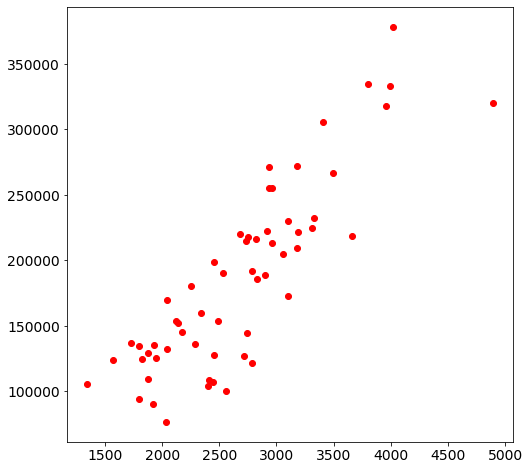

In [0]:
# Plot Total SF vs. Price
visualize_data(df_housing['Total SF'], df_housing['SalePrice'])



### What does the visualization tell us?

There seems to be a **linear** relationship between the size of the house (as shown in Total SF) and Price.  

This suggests that we should perform Linear Regression. Where the relationship in the data is:
 y = mx + b.  
 Or in our case, Price = m * Total SF + b
 
With respect to defining the appropriate equation, we can see the difference between traditional programming and Machine Learning as:

* In tradition programming **we define what the equation** is through structures such as conditional statements

* In Machine Learning, our model **learns from the data** what the appropriate equation is.

## Prepare Data

If values are on very different scales it will be difficult for the model to determine the relationships between features.  With our data, Square Footage(SF) ranges from 800-4200, and Prices range from 80,000 to 400,0000.  This means there is a nearly 100 times difference in scale.  When we normalize we will reduce both qualtities to the same scale while preserving the differences between prices and sizes of homes.  This will help our model learn the relationship between price and size.

In [0]:
# Scale data so SF and Sale Price are on similar scales with values 
#  from 0.0 to 1.0

from sklearn.preprocessing import MinMaxScaler

sf_scaler = MinMaxScaler()
sf_scaled = sf_scaler.fit_transform(df_housing['Total SF'].values.reshape(-1,1).astype(np.float64))
    
price_scaler = MinMaxScaler()
price_scaled = price_scaler.fit_transform(df_housing['SalePrice'].values.reshape(-1,1).astype(np.float64))

## Create Model

Here we create a model to learn from our data.  Our data looks linearly related, so we can use a straight line
to fit our data.  So we are going to create a model that is based on the equation of a straight line.

From our training data we will learn that once we can define this line's parameters we can use it's equation to predict the value of any future data.

We use Tensorflow's Keras library to make the process easy.

We create a sequential model where the output of one layer becomes the input of the next layer.

This model is a simple Neural Network that implements y = wx + bias, where **w is a weight** and **bias is an offset**.

*You may recognize from Algebra or Geometry that y = wx + bias is the equation of straight line, where w is the slope and bias is the offset.  (See https://en.wikipedia.org/wiki/Line_(geometry) for a description.)*

Therefore the goal is to use our data to train the model and learn the best values for w and bias.


### Our Model

We create our linear model using TensorFlow's Keras library.   Using Keras makes it easy for us to create, train, and evaluate our model.



In [0]:
# Create model using the TensorFlow Keras library
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, activation='linear', input_shape=[1],
                                kernel_initializer='random_uniform',
                                bias_initializer='zeros'))


### Compile the model

The model is now defined, but is not trained, or even ready to be trained.

We will train the model by passing training data throught it and adjusting the weight and bias to reduce loss (error).  To perform these tasks we need a method for 
*  measuring loss and 
*  optimizing the values of the weight and bias to minimize this loss. 

There are many ways of measuring loss and optimizing the values.  We are going to use **Mean-Squared Error** ('mean_squared_error') to measure loss, and the process of **Stochasitic Gradient Descent** ('sgd') to find the optimal weight and bias to minimize the loss. *Note: We use the variant of sgd called mini-batch gradient descent.  And set the batch size in the fit method below.*

We set these parameters for the model with the **compile** statement. 

In [0]:
# Compile model
optimizer = "sgd"
model.compile(loss='mean_squared_error', optimizer=optimizer )


## Train the Model

Once the model has been defined and compiled we can train the model.  We do this with training data.  

We want to split our prepared dataset into 2 datasets.  One dataset will be used for training, and other dataset will used for testing.  **We never used testing data for training or training data for testing.**

In [0]:
# Split the dataset into training dataset - 70%, Testing dataset - 30%
# we do this using the sklearn train_test_split method
from sklearn.model_selection import train_test_split

sf_train_scaled, sf_test_scaled, price_train_scaled, price_test_scaled = train_test_split(sf_scaled, 
                                                    price_scaled, 
                                                    test_size=0.3, random_state=42)

We pass the training data through the model multiple times.  On each pass, the loss function (that we defined in the model compile) will be used to calculate loss.  And the optimizer will be used to make adjustments to the weights and bias (just called weights from here on) to minimize this error.  

We repeat this process of calculating the loss with the current weights and updating the weights to minimize loss for the specified number of **epochs**.  *We should see the loss decrease over time.*

We can set the *verbose* flag to tell Keras how much information to show during the training process, 0 is none, 1 and 2 show more in-progress information.

In [0]:

# Train model using data
initial_epochs = 8
batch_size = 10
train_hist = model.fit(sf_train_scaled, price_train_scaled, 
                       epochs=initial_epochs, batch_size=batch_size, verbose=1)

# Is 8 epochs enough??? Maybe/Maybe not

Train on 41 samples
Epoch 1/8
41/41 [==============================] - 1s 14ms/sample - loss: 0.1927
Epoch 2/8
41/41 [==============================] - 0s 371us/sample - loss: 0.1650
Epoch 3/8
41/41 [==============================] - 0s 331us/sample - loss: 0.1405
Epoch 4/8
41/41 [==============================] - 0s 327us/sample - loss: 0.1160
Epoch 5/8
41/41 [==============================] - 0s 283us/sample - loss: 0.1005
Epoch 6/8
41/41 [==============================] - 0s 341us/sample - loss: 0.0889
Epoch 7/8
41/41 [==============================] - 0s 285us/sample - loss: 0.0793
Epoch 8/8
41/41 [==============================] - 0s 340us/sample - loss: 0.0722


### Visually Confirm Model Training

Our model learned the best weight and bias for our training data that it could through the defined number of epochs.  Let's see if a line drawn with these learned weights and bias looks reasonable.

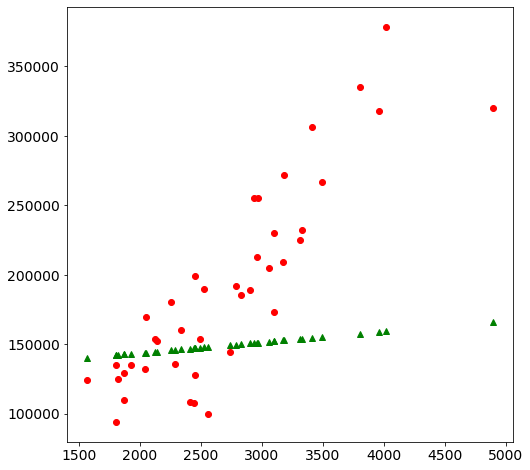

In [0]:

#  predict the price with our trained model
price_predicted_scaled =  model.predict(sf_train_scaled)
visualize_data(sf_scaler.inverse_transform(sf_train_scaled), price_scaler.inverse_transform(price_train_scaled),
               sf_scaler.inverse_transform(sf_train_scaled), price_scaler.inverse_transform(price_predicted_scaled),
               add_addn_reg_line=False)
               
# If line looks bad, what do we do?

### Evaluate Training


Our trained model does not looks too good !!!

What can we do?  

Should we change model architecture?  Does linear look incorrect?  

> NO


What does loss look like?


<class 'tensorflow.python.keras.callbacks.History'>


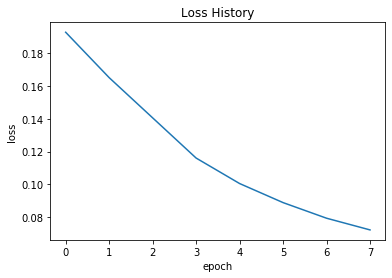

In [0]:
def plot_loss(hist):
  # plot the loss
  plt.title('Loss History')
  plt.plot(hist.history['loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.show()

print(type(train_hist))
plot_loss(train_hist)



> LOSS STILL LOOKS HIGH.  BUT IS DECREASING.



Perhaps we have not converged to the lowest loss.  What can we do????  

Train with more data?  

> NO.  WE HAVE ALL THE DATA

Train for more epochs and check loss to ensure values have converged?
 > YES!!!

### Training more epochs

The model is partially trained but the results are not great.  Let's go back and train the model some more. 

The question is how much more?  

We want to ensure the model is converged to a range of loss values.   So what we will see in the training output is the loss value starts to stay in a specific range .   It may go up or down a little, but there should be a stable range.

In [0]:
# Train model using data.  This time, train for additional epochs
# Also capture the changes over time in the history variable, train_hist so we 
#   can see if loss is converging
addn_epochs = 1200
train_hist_addn =model.fit(sf_train_scaled, price_train_scaled,  
                     epochs=addn_epochs, verbose=1)

Train on 41 samples
Epoch 1/1200
41/41 [==============================] - 0s 284us/sample - loss: 0.0662
Epoch 2/1200
41/41 [==============================] - 0s 145us/sample - loss: 0.0638
Epoch 3/1200
41/41 [==============================] - 0s 176us/sample - loss: 0.0620
Epoch 4/1200
41/41 [==============================] - 0s 161us/sample - loss: 0.0601
Epoch 5/1200
41/41 [==============================] - 0s 188us/sample - loss: 0.0588
Epoch 6/1200
41/41 [==============================] - 0s 198us/sample - loss: 0.0568
Epoch 7/1200
41/41 [==============================] - 0s 210us/sample - loss: 0.0554
Epoch 8/1200
41/41 [==============================] - 0s 160us/sample - loss: 0.0540
Epoch 9/1200
41/41 [==============================] - 0s 165us/sample - loss: 0.0526
Epoch 10/1200
41/41 [==============================] - 0s 159us/sample - loss: 0.0514
Epoch 11/1200
41/41 [==============================] - 0s 162us/sample - loss: 0.0502
Epoch 12/1200
41/41 [======================

Plot the loss history values to see if our model converged.

Because a model can have a history of many  different metrics over time, there is a history object which has a keys dictionary of 
metrics whose values were stored on each epoch. By plotting the values for the 'loss' key we can answer:


1.   Did the loss converge?
2.   How many epochs were required for the loss to converge?



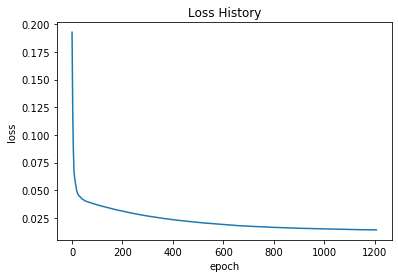

In [0]:
train_hist.history['loss'].extend(train_hist_addn.history['loss'])   # add the addition epochs to the  training history
plot_loss(train_hist)

### Visually Confirm Model after Additional Training

As the  plot showed, the model's loss converged by 1000 epochs.  So the model should be trained to allow us to make accurate predictions.  

Let's again plot the predicted price for each size.  And see if a line drawn with the learned weight and bias looks reasonable.


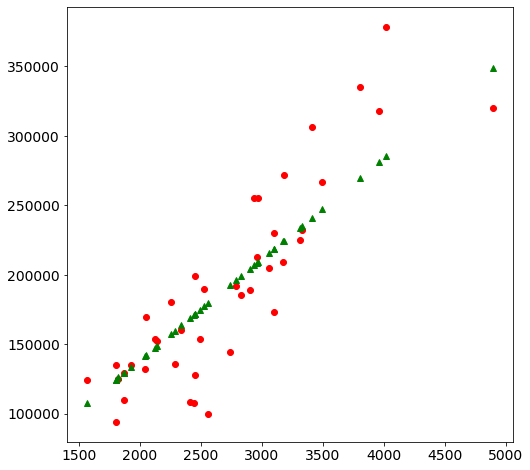

In [0]:
# Visualize data and regression line for learned weights
price_predicted_scaled =  model.predict(sf_train_scaled)
visualize_data(sf_scaler.inverse_transform(sf_train_scaled), 
               price_scaler.inverse_transform(price_train_scaled),
               sf_scaler.inverse_transform(sf_train_scaled), 
               price_scaler.inverse_transform(price_predicted_scaled),
               add_addn_reg_line=False)


**Yes.  The predicted line looks good!!!**

## Evaluate Trained Model

Once we have the model trained, we want to test **with data not used to train the model!!!**

The use of data not used in training to test the model is key.  If you use training data our testing results will be overly accurate and will not relect *"real-life"* usage of the trained model to make predictions.

prediction mean squared error: 0.019206074485999126

Green triangles are Test Square footage with predicted Price


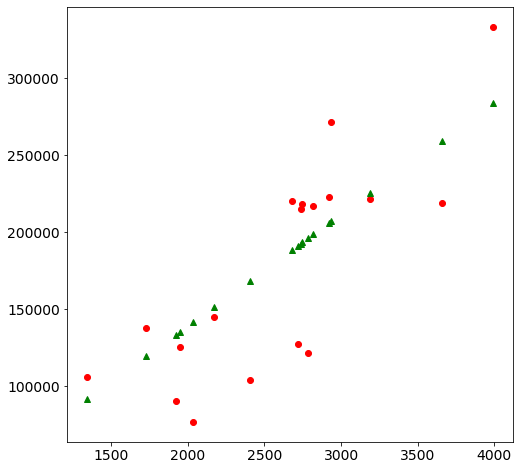


Our predicted values fit the data well!


In [0]:
# Make a price prediction on data the model has never seen before, i.e. 
#    the Test data square footage
price_test_pred_scaled = model.predict(sf_test_scaled)

# calculate the mean squared error for the prediction, lower is better
from sklearn.metrics import mean_squared_error
print("prediction mean squared error:", 
          mean_squared_error(price_test_scaled, price_test_pred_scaled ))

# Visualize data
#    plus the test square footage and predicted price
print('\nGreen triangles are Test Square footage with predicted Price')
visualize_data(sf_scaler.inverse_transform(sf_test_scaled),
               price_scaler.inverse_transform(price_test_scaled),
               sf_scaler.inverse_transform(sf_test_scaled), 
               price_scaler.inverse_transform(price_test_pred_scaled),
               add_addn_reg_line=False)
print('\nOur predicted values fit the data well!')

## What we have learned



*   In Machine Learning we often spend considerable effort getting data in a form that our models can learn from the data.
* A single neuron model can learn the appropriate slope and offset for the data 
*   Building this model was made easier by TensorFlow's implementation of the Keras library
*   But to learn from the data we need to pass the data through the model enough times to get the loss to converge
*   When we do that, the model learns the data's slope and offset more accurately.
*  And when we apply these learned values, the predict prices from the test data's Square Footage are reasonable. 

